In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
X = tf.range(0,100,2)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])>

In [16]:
X.dtype

tf.int32

In [4]:
y = 2*X + 3
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([  3,   7,  11,  15,  19,  23,  27,  31,  35,  39,  43,  47,  51,
        55,  59,  63,  67,  71,  75,  79,  83,  87,  91,  95,  99, 103,
       107, 111, 115, 119, 123, 127, 131, 135, 139, 143, 147, 151, 155,
       159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 199])>

In [17]:
y.dtype

tf.int32

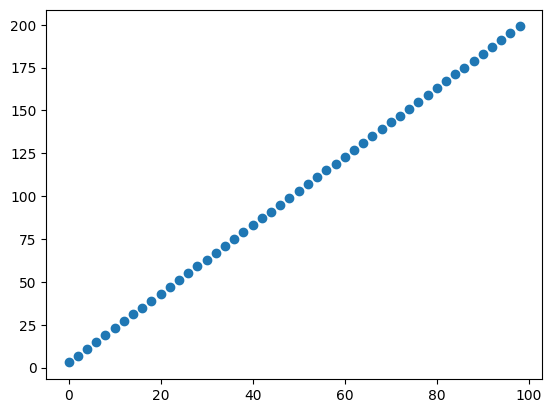

In [6]:
plt.scatter(X,y)

### Model Building

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
metrics = ['mae'])

model.fit(X,y,epochs=50)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 136.4250 - mae: 136.4250  
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 123.5610 - mae: 123.5610 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 110.7892 - mae: 110.7892 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 104.5876 - mae: 104.5876 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 95.5412 - mae: 95.5412 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85.6001 - mae: 85.6001 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79.3183 - mae: 79.3183 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 68.5123 - mae: 68.5123 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61.9477 - mae: 61.9477 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51.9235 - mae: 51.9235 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.5495 - mae: 40.5495 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.5992 - mae: 31.5992 
Epoch 13/50
2/2 ━━━━━━━━━━━━

In [28]:
import numpy as np
X = np.array([[150],[-10]])

model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[304.3819  ],
       [-17.404348]], dtype=float32)

In [30]:
X=150
y = 2*X + 3
y

303

In [31]:
X=-10
y = 2*X + 3
y

-17

### Save model using SavedModel format

In [37]:
model.save('new_model_1.keras')


### using HDF5 format

In [38]:
model.save('new_model_2.h5')


### Load model using SavedModel format

In [39]:
new_model_1 = tf.keras.models.load_model('new_model_1.keras')

In [40]:
X1 = np.array([[150],[-10]])
new_model_1.predict(X1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[304.3819  ],
       [-17.404348]], dtype=float32)

In [41]:
new_model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

In [42]:
new_model_2 = tf.keras.models.load_model('new_model_2.h5')

In [43]:
X2 = np.array([[150],[-10]])
new_model_1.predict(X2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[304.3819  ],
       [-17.404348]], dtype=float32)

In [44]:
new_model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)